In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import itertools
import json
import matplotlib
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [2]:
import librosa
import librosa.display

from glob import glob

# Before Checkpoint

## Getting Song Chart

- We get the songs chart from https://spotifycharts.com/regional
- Contains 3 regions
    - US
    - UK
    - JP

In [3]:
example_chart = pd.read_csv('charts/regional-us-daily-latest.csv')
example_chart.head()

,Position,Track Name,Artist,Streams,URL
0,1,Shape of You,Ed Sheeran,1551040,https://open.spotify.com/track/7qiZfU4dY1lWllz...
1,2,Mask Off,Future,1360522,https://open.spotify.com/track/3rOSwuTsUlJp0Pu...
2,3,iSpy (feat. Lil Yachty),Kyle,1213427,https://open.spotify.com/track/2EEeOnHehOozLq4...
3,4,That's What I Like,Bruno Mars,1154088,https://open.spotify.com/track/0KKkJNfGyhkQ5aF...
4,5,Tunnel Vision,Kodak Black,1059848,https://open.spotify.com/track/2BoS7pU92MQtynh...


## Getting Audio Files

- **Spotify** provide **API**
    - https://api.spotify.com/v1/tracks/{track_id}

- Example
    - https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3

- We downloaded 100 preview tracks for each region
    - Total 300 preview tracks

## Exploring Features

- Library that we use
    - [aubio](https://github.com/aubio/aubio)
    - [librosa](https://github.com/librosa/librosa)

- Finding features
    - **duration**
    - **Rhythm Feature**
        - **bpm** (beat per minute)
    - **Spectral Features**: Help indicate the tone of the song
        - **spectral centroid**: Measure of the brightness of a sound
        - **zero crossing rate**: Times the untransformed wave goes from positive to negative
        - **rolloff**: Measure of spectral shape

Spectral Features' content taken from: http://michael.hahsler.net/SMU/EMIS8331/S2012/tutorials/Music_Mining_slides.pdf

# After Checkpoint

## Sample Tracks

## Japanese

In [4]:
jp_tracks = glob('tracks/jp/*.mp3')
random_idx = np.random.choice(len(jp_tracks), 4)

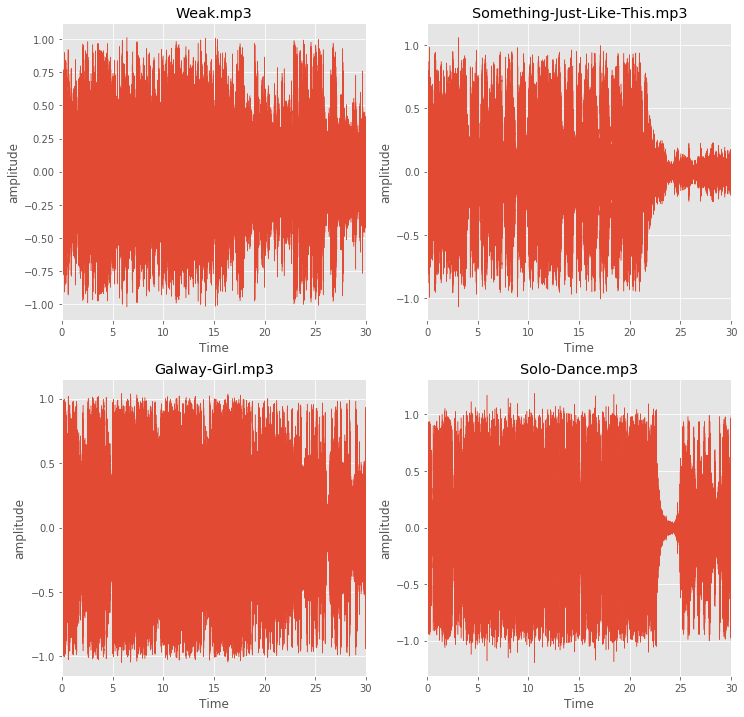

In [5]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    jp_track = jp_tracks[idx]
    y, sr = librosa.load(jp_track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(jp_track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

## UK

In [6]:
uk_tracks = glob('tracks/uk/*.mp3')
random_idx = np.random.choice(len(uk_tracks), 4)

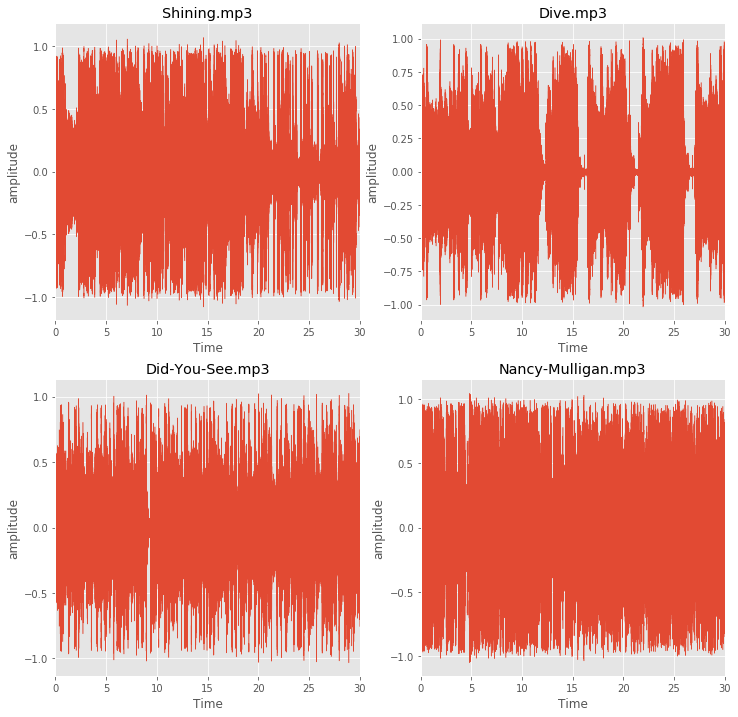

In [7]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    uk_track = uk_tracks[idx]
    y, sr = librosa.load(uk_track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(uk_track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

## US

In [8]:
us_tracks = glob('tracks/us/*.mp3')
random_idx = np.random.choice(len(us_tracks), 4)

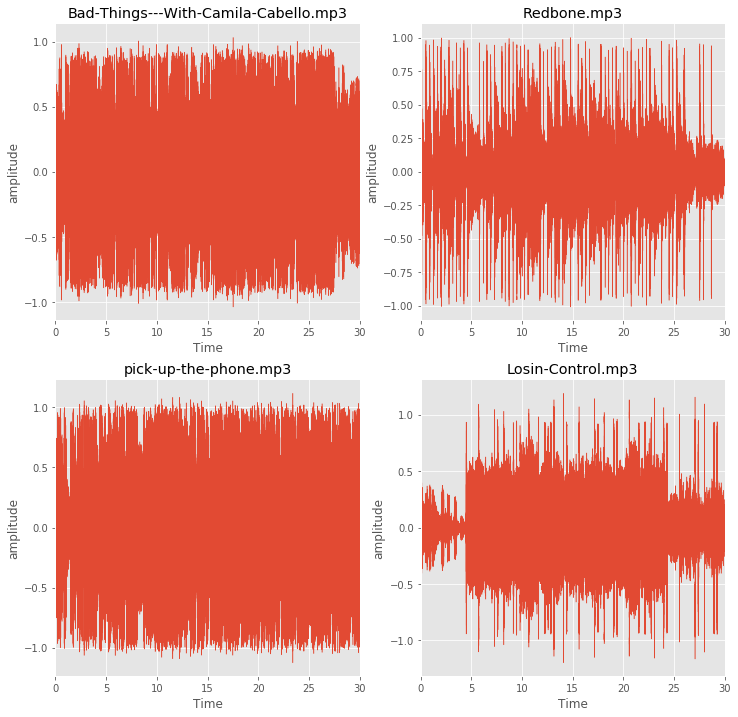

In [9]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    us_track = us_tracks[idx]
    y, sr = librosa.load(us_track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(us_track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

## Features

- bpm

### mean and std
- spectral centroid: Measure of the brightness of a sound
- spectral rolloff: Measure of spectral shape
- zero crossing rate: Times the untransformed wave goes from positive to negative
- mfcc (Mel-frequency cepstral coefficients)
    - [mfcc](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)

In [10]:
def features(x, sr):
    x = np.array(x)
    f = []
    # bpm, spectral_centroid_mean, spectral_centroid_std, rolloff_mean, rolloff_std, zero_crossing_rate_mean, zero_crossing_rate_std
    # mfcc (Mel-frequency cepstral coefficients): distribution of power into frequency components composing that signal
    
    bpm = librosa.beat.tempo(x, sr)
    
    spectral_centroid = librosa.feature.spectral_centroid(x, sr)[0]
    spectral_centroid_mean = spectral_centroid.mean()
    spectral_centroid_std = spectral_centroid.std()
    
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr)[0]
    spectral_rolloff_mean = spectral_rolloff.mean()
    spectral_rolloff_std = spectral_rolloff.std()
    
    zero_crossing_rate = librosa.feature.zero_crossing_rate(x)[0]
    zero_crossing_rate_mean = zero_crossing_rate.mean()
    zero_crossing_rate_std = zero_crossing_rate.std()
    
    mfcc = librosa.feature.mfcc(x, sr)
    mfcc_mean = mfcc.mean()
    mfcc_std = mfcc.std()
    
    f.append(bpm)
    f.append(spectral_centroid_mean)
    f.append(spectral_centroid_std)
    f.append(spectral_rolloff_mean)
    f.append(spectral_rolloff_std)
    f.append(zero_crossing_rate_mean)
    f.append(zero_crossing_rate_std)
    f.append(mfcc_mean)
    f.append(mfcc_std)
    
    return f

## Songs from Spotify (Unique song)

In [11]:
tracks = glob('tracks/*.mp3')

In [12]:
len(tracks)

189

In [13]:
data = []

for track in tracks:
    y, sr = librosa.load(track)
    data.append(features(y, sr=sr))

In [14]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()

In [15]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print(pca.explained_variance_ratio_)

[  8.37293794e-01   1.50605992e-01   8.93190462e-03   2.90615455e-03
   2.43448838e-04   1.51701484e-05   3.53628421e-06   7.97621684e-11
   2.96746256e-11]


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.83729379,  0.98789979,  0.99683169,  0.99973784,  0.99998129,
        0.99999646,  1.        ,  1.        ,  1.        ])

In [18]:
data_f = pca.transform(data)

In [19]:
def inspect(data):
    _, nc = data.shape
    fig, ax = plt.subplots(nc,nc,figsize=(30,30))
    for i in range(nc):
        for j in range(nc):
            if i != j:
                ax[i][j].scatter(data[:,i], data[:,j])
            else:
                ax[i][j].hist(data[:,i])

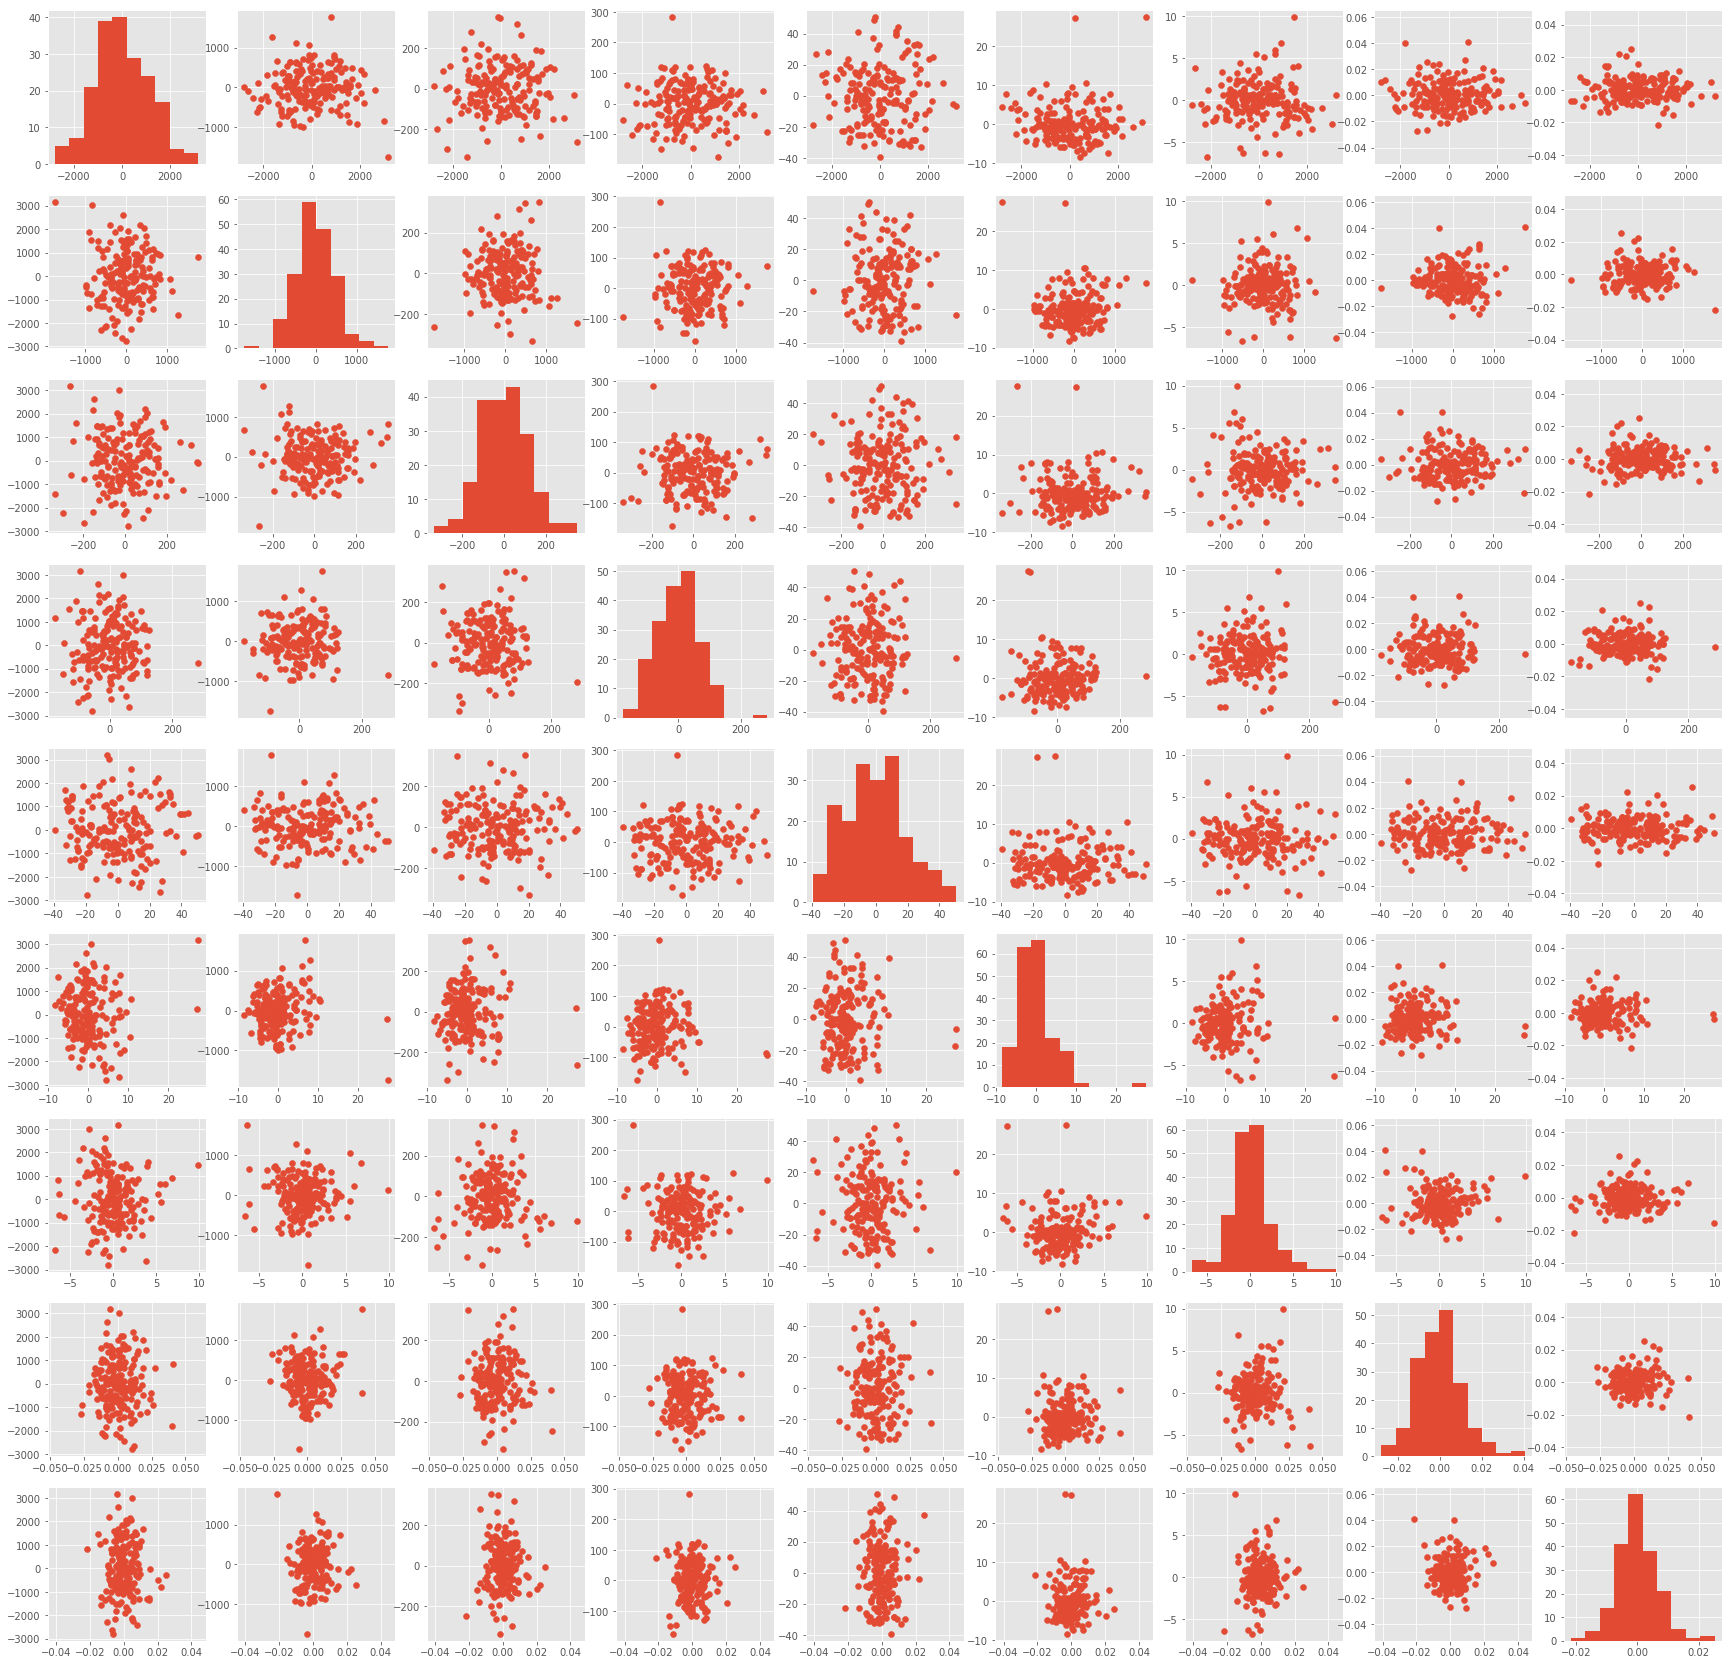

In [20]:
inspect(data_f)

## Recentering and Rescaling

In [21]:
d2 = data - np.mean(data,axis=0)

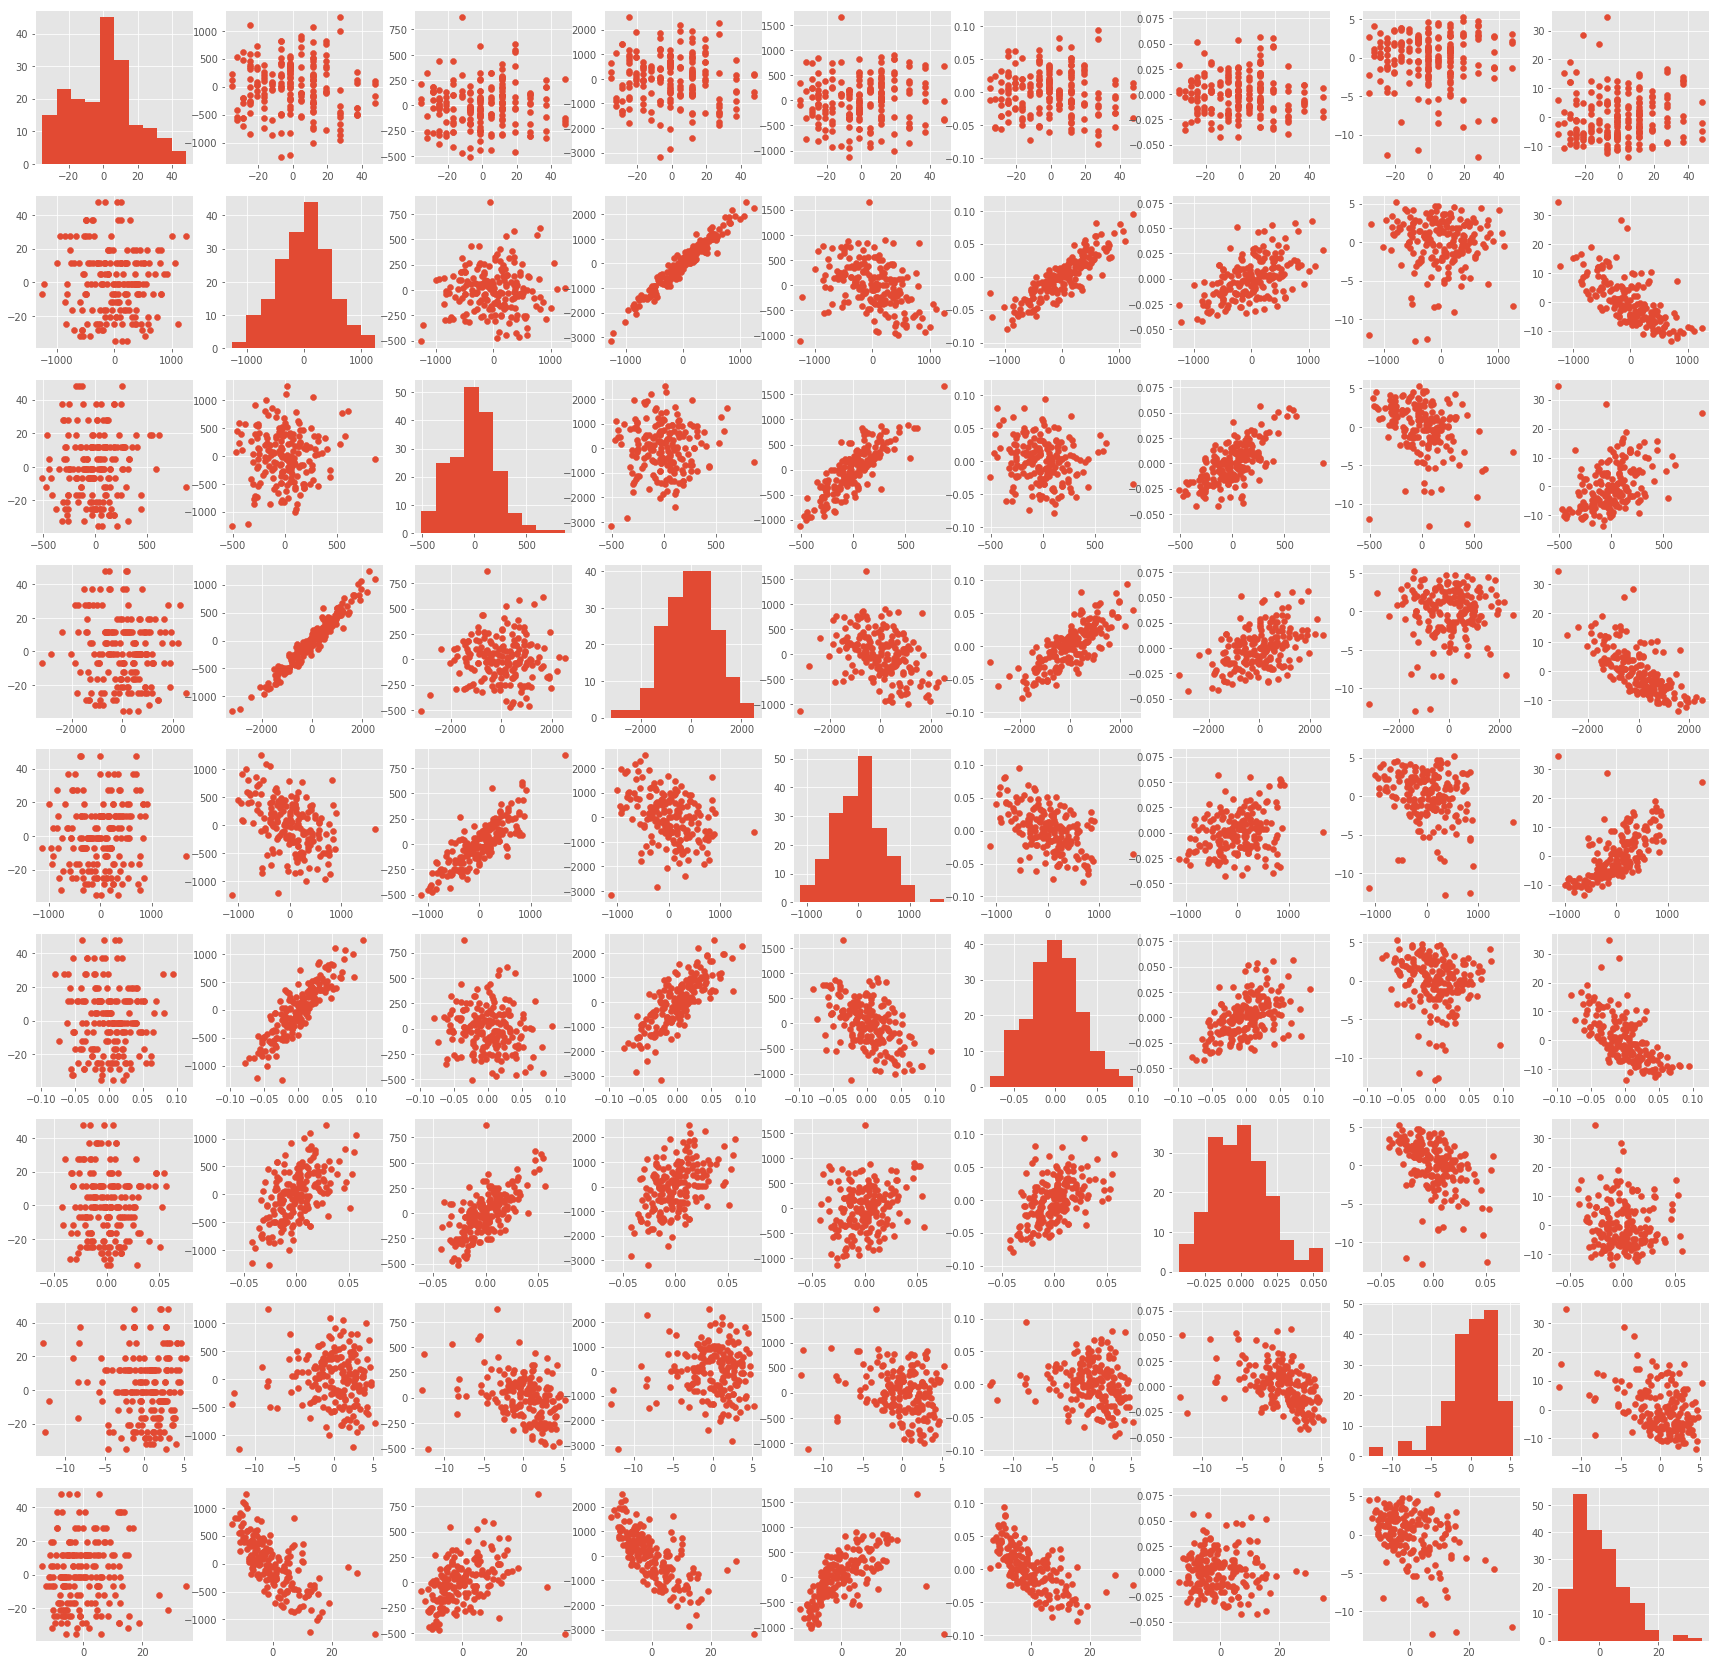

In [22]:
inspect(d2)

In [23]:
# d3 = d2 / np.std(d2,axis=0) # z score

In [24]:
# inspect(d3)

In [25]:
d4 = d2 / np.max(d2,axis=0)

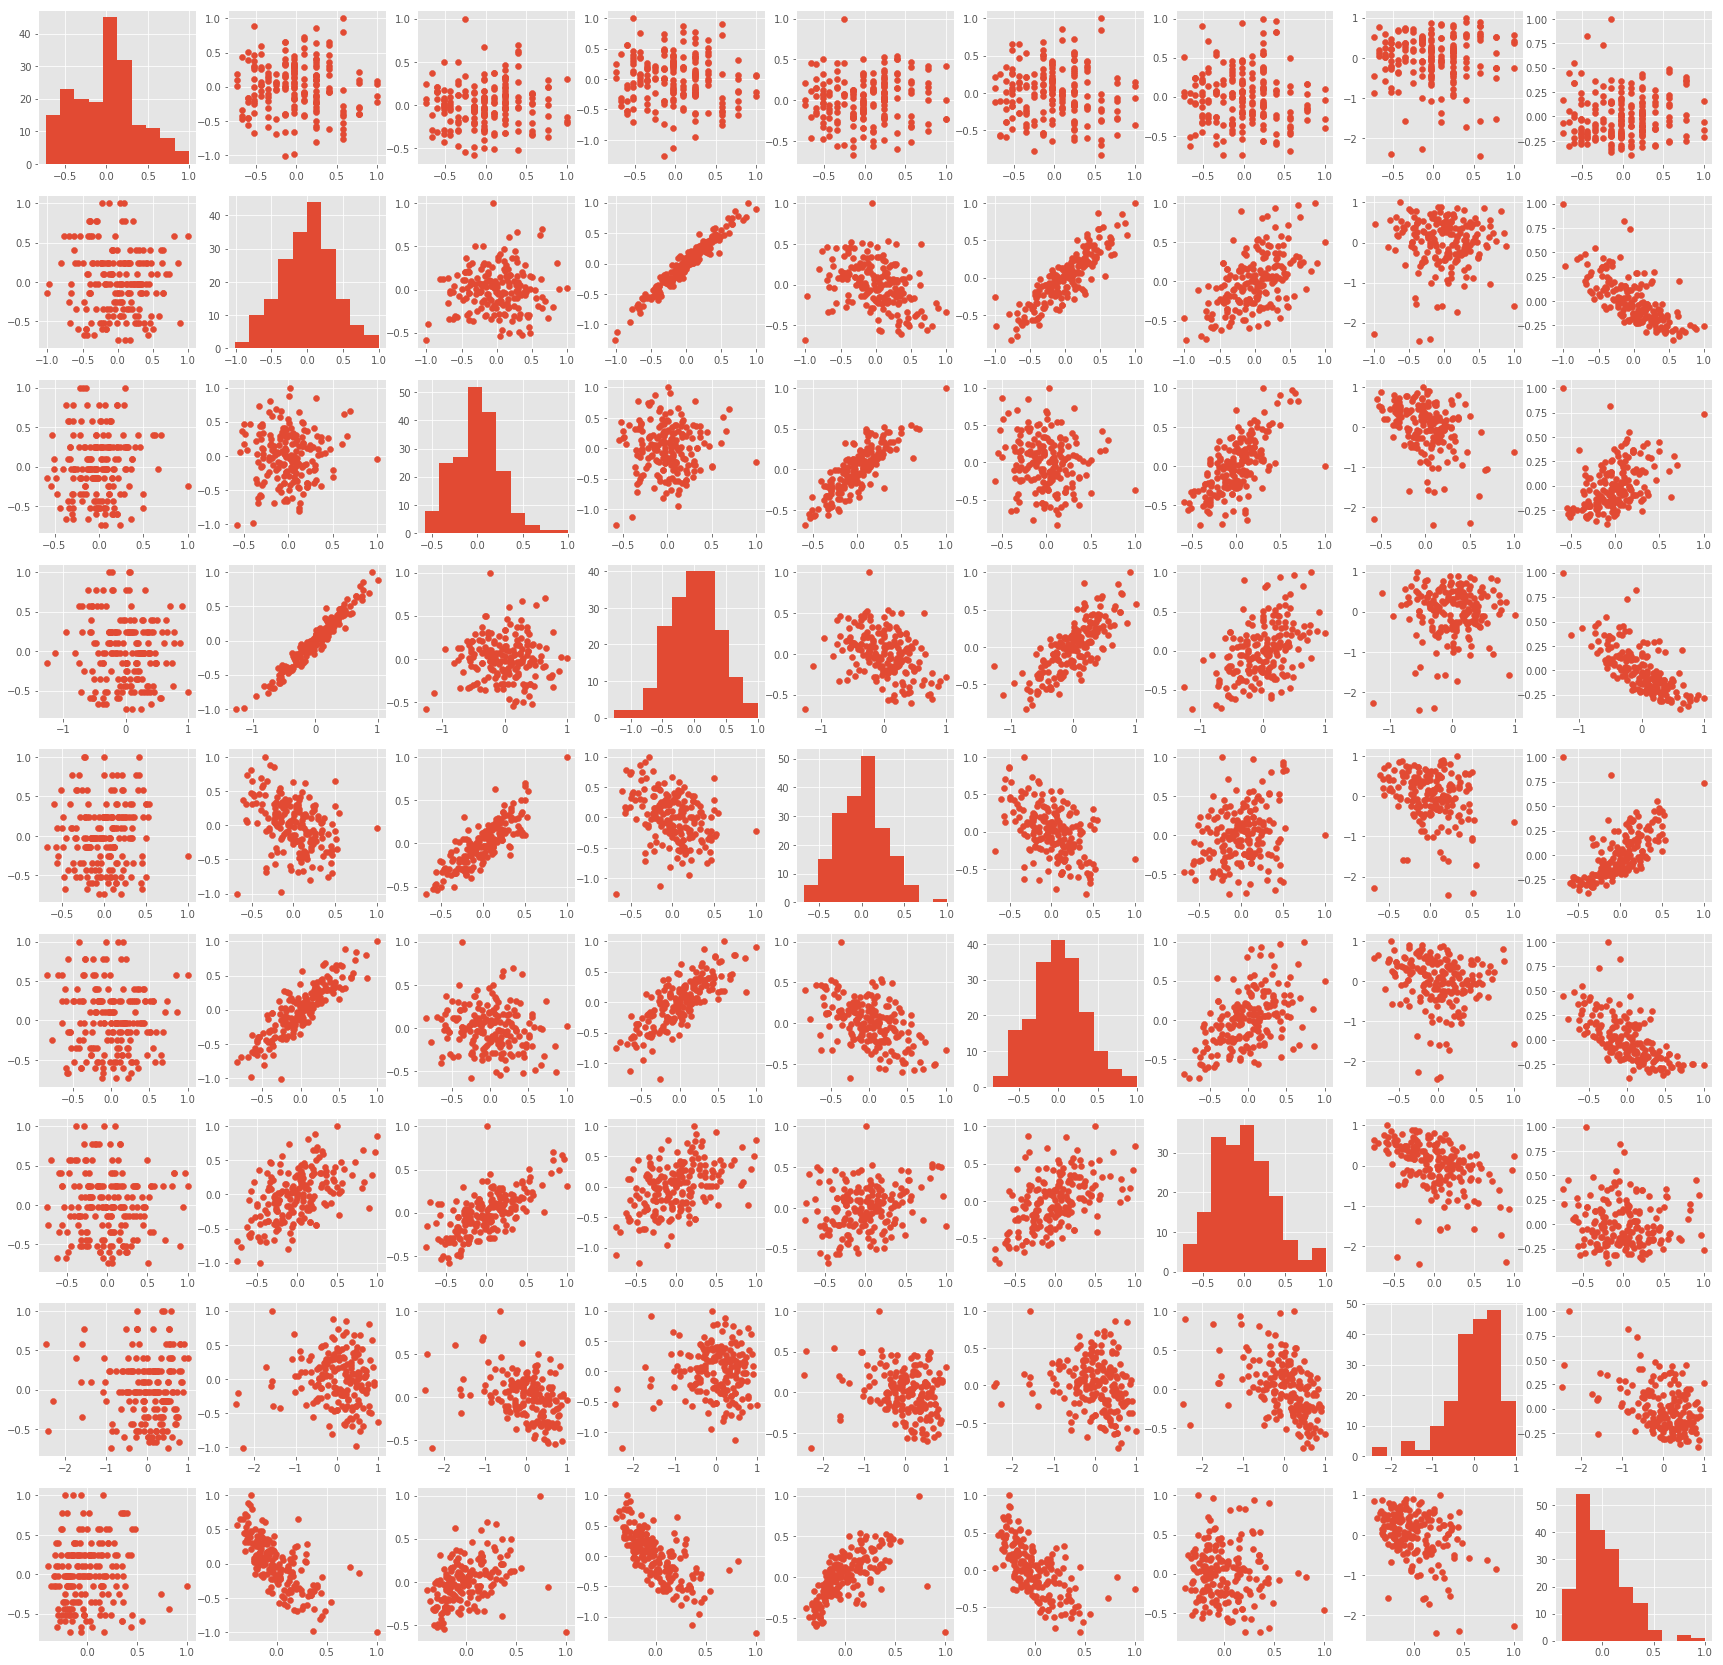

In [26]:
inspect(d4)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(8, random_state=8)
Y_hat = kmeans.fit(data_f).labels_

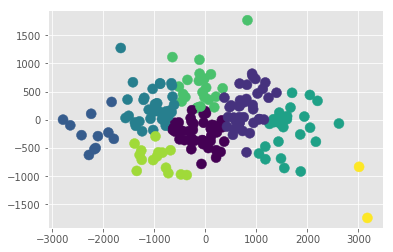

In [28]:
plt.scatter(data_f[:,0], data_f[:,1], c=Y_hat, s=100);

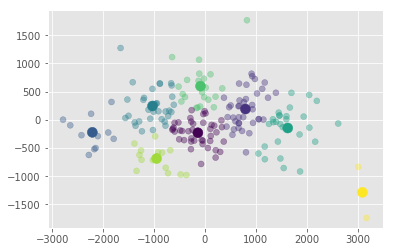

In [29]:
plt.scatter(data_f[:,0], data_f[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))

In [30]:
min_data = np.min(data_f)
mean_data = np.mean(data_f)
max_data = np.max(data_f)
std_data = np.std(data_f)

In [31]:
min_data, mean_data, max_data, std_data

(-2788.3133402908525,
 -1.2297694380233598e-14,
 3174.5973287941474,
 405.98695690561368)

## Songs from Spotify (Not unique song)


In [32]:
tracks = glob('tracks/jp/*.mp3') + glob('tracks/uk/*.mp3') + glob('tracks/us/*.mp3')

In [33]:
len(tracks)

300

In [34]:
data = []

for track in tracks:
    y, sr = librosa.load(track)
    data.append(features(y, sr=sr))

In [35]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()

In [36]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
print(pca.explained_variance_ratio_)

[  8.67168183e-01   1.21912041e-01   7.84383274e-03   2.84181570e-03
   2.17916518e-04   1.31880542e-05   3.02209990e-06   8.13781240e-11
   2.79138283e-11]


In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.86716818,  0.98908022,  0.99692406,  0.99976587,  0.99998379,
        0.99999698,  1.        ,  1.        ,  1.        ])

In [39]:
data_f = pca.transform(data)

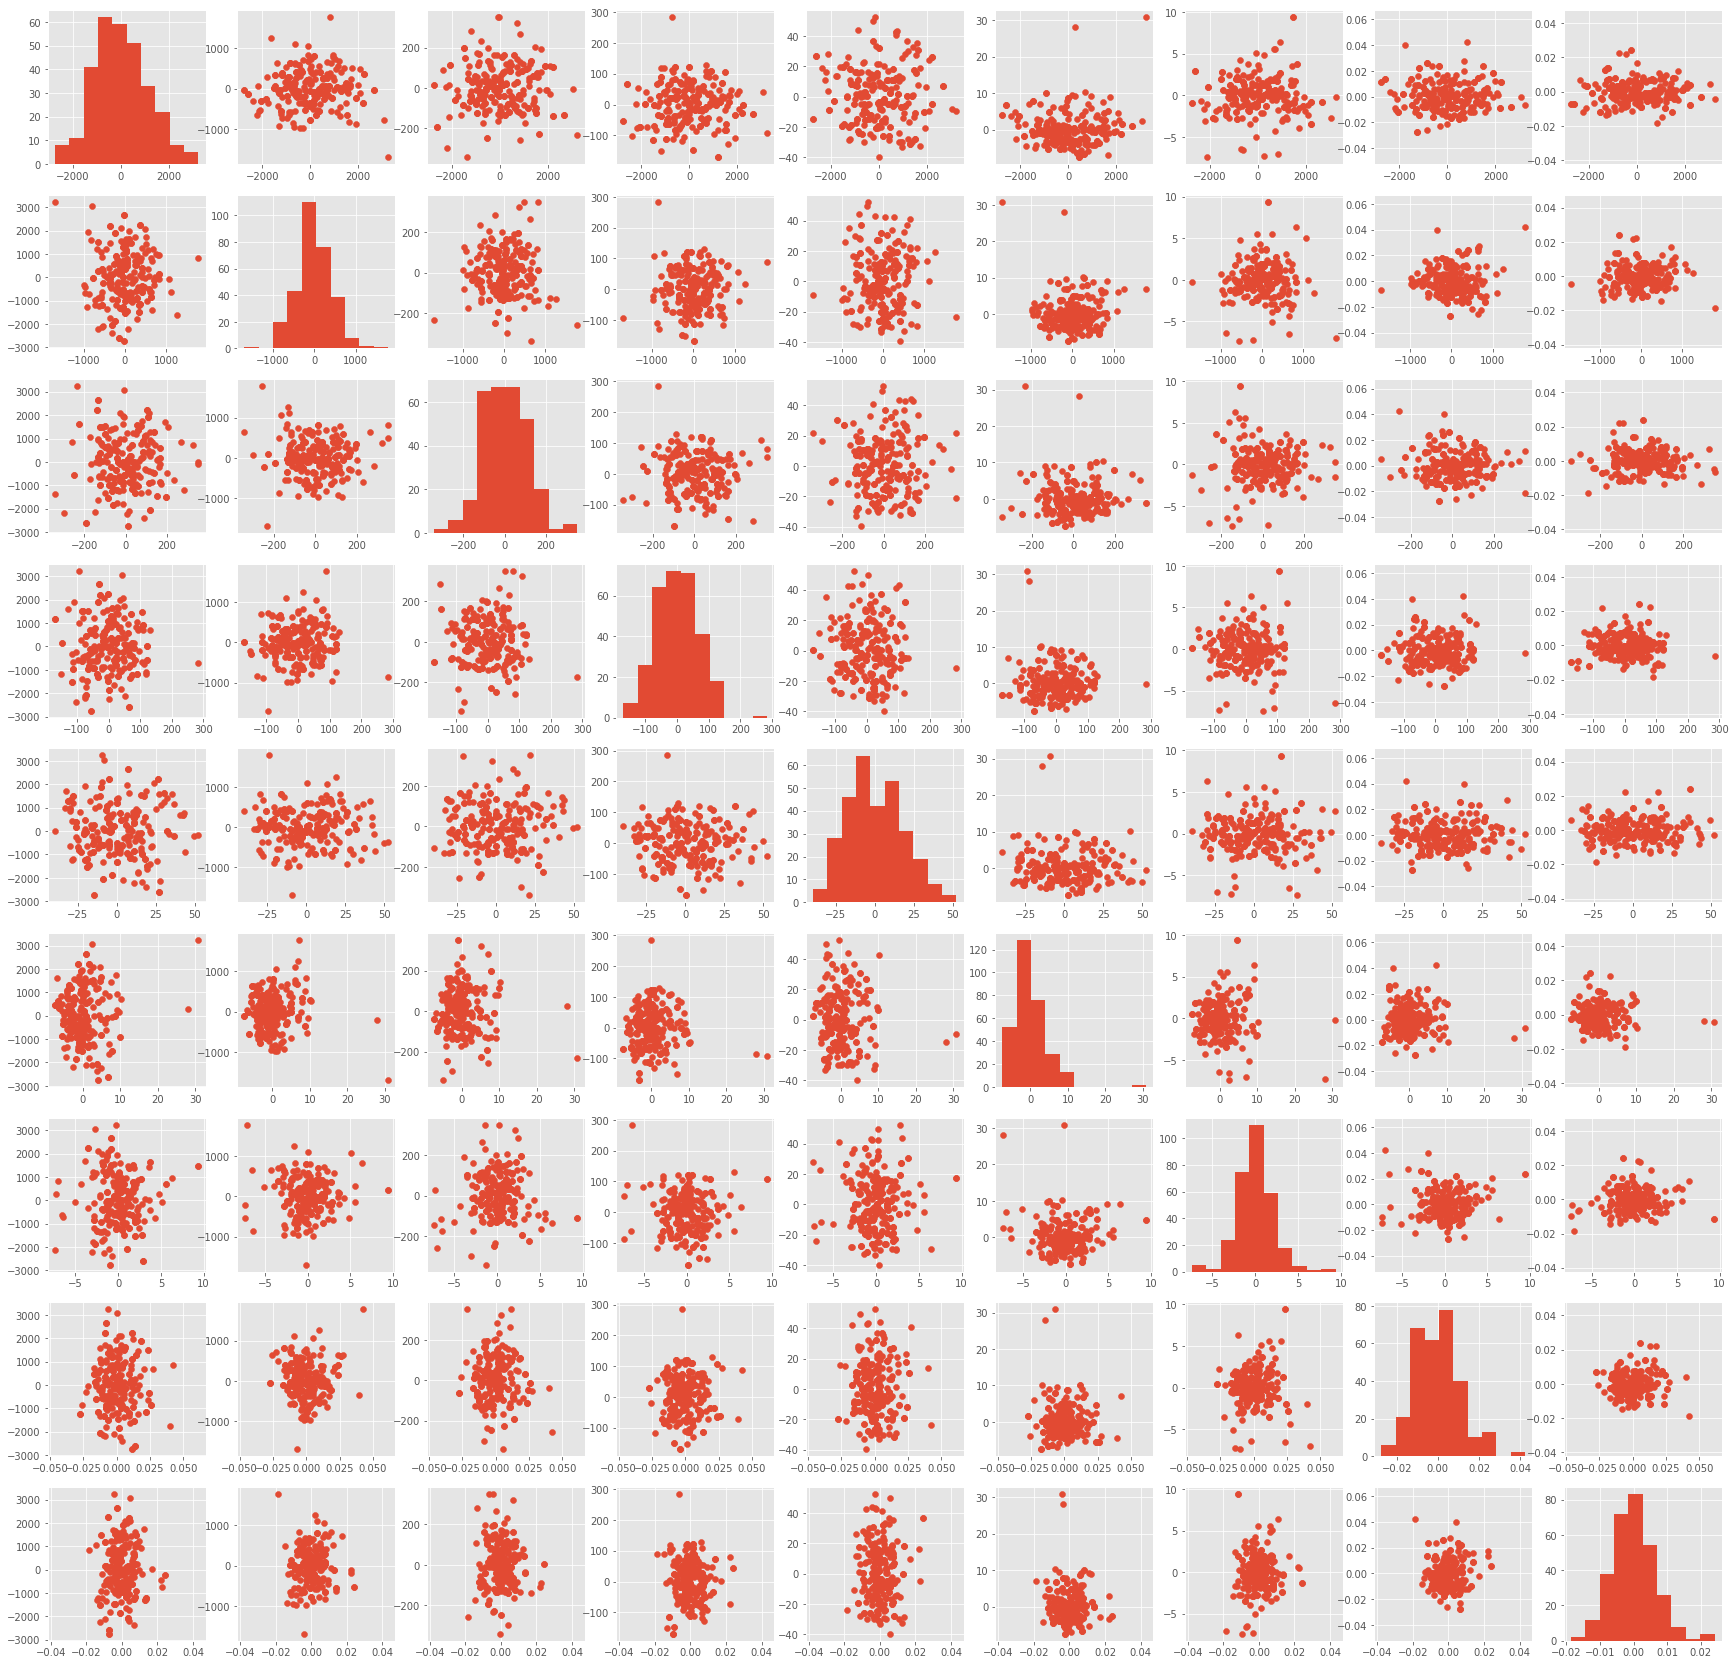

In [40]:
inspect(data_f)

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(8, random_state=8)
Y_hat = kmeans.fit(data_f).labels_

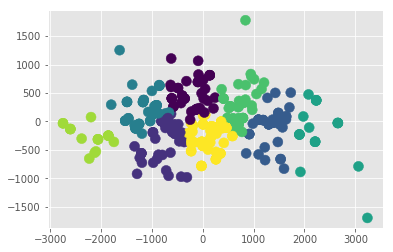

In [42]:
plt.scatter(data_f[:,0], data_f[:,1], c=Y_hat, s=100);

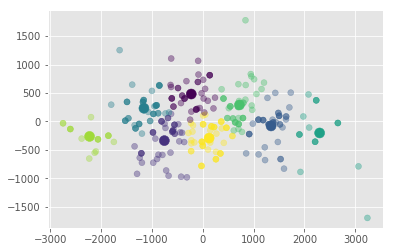

In [43]:
plt.scatter(data_f[:,0], data_f[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))

In [44]:
min_data = np.min(data_f)
mean_data = np.mean(data_f)
max_data = np.max(data_f)
std_data = np.std(data_f)

In [45]:
min_data, mean_data, max_data, std_data

(-2749.2517919130314,
 -2.1827872842550277e-13,
 3237.9286904462101,
 405.56040456476785)

## Different genres of songs

- Classical
- Jazz
- Rock

In [46]:
rock = glob('tracks/rock/*.mp3')
random_idx = np.random.choice(len(rock), 4)

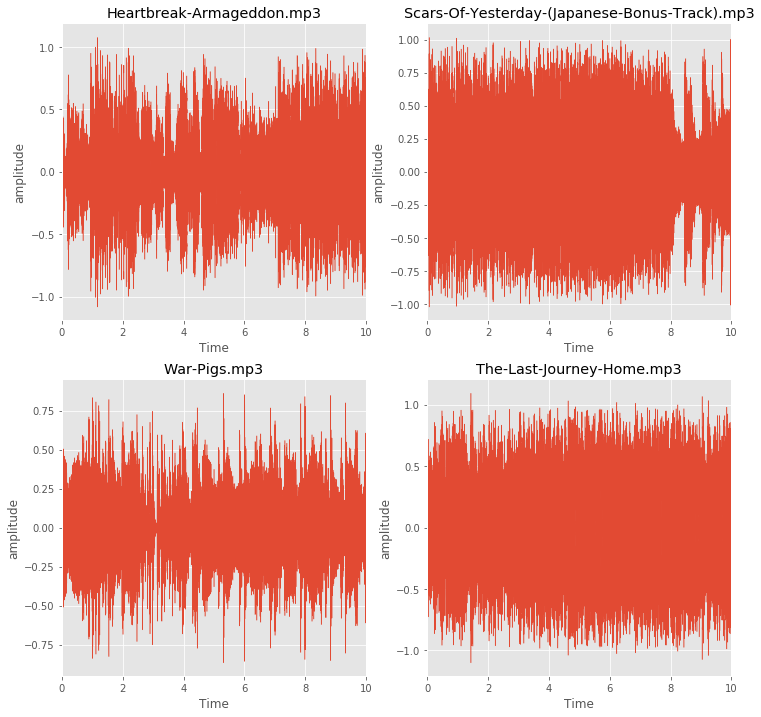

In [47]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    track = rock[idx]
    y, sr = librosa.load(track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [48]:
classical = glob('tracks/classical/*.mp3')
random_idx = np.random.choice(len(classical), 4)

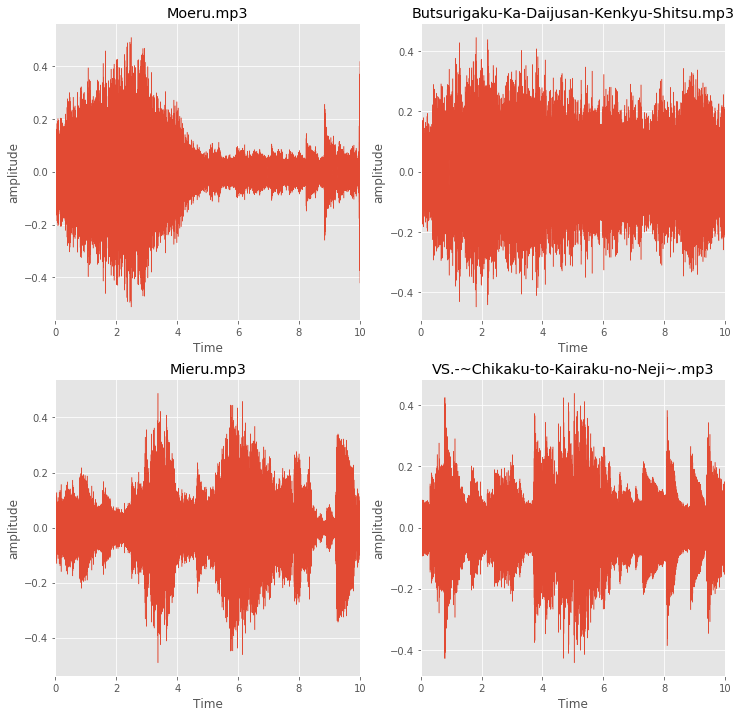

In [49]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    track = classical[idx]
    y, sr = librosa.load(track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [50]:
jazz = glob('tracks/jazz/*.mp3')
random_idx = np.random.choice(len(jazz), 4)

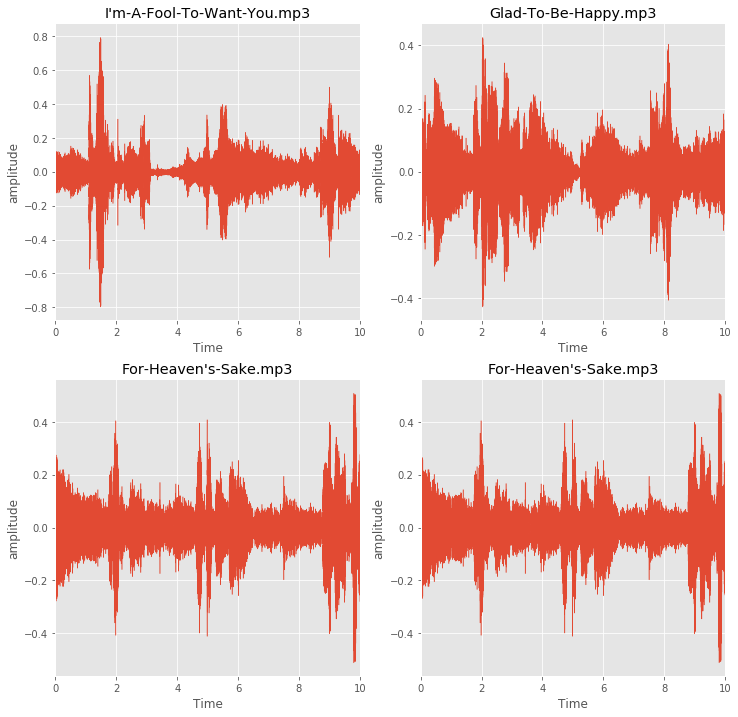

In [51]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    track = jazz[idx]
    y, sr = librosa.load(track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [52]:
random_idx = np.random.choice(len(jazz), 10)
filter_jazz = [jazz[idx] for idx in random_idx]

In [53]:
tracks = rock + classical + filter_jazz
# tracks = classical + rock

In [54]:
data = []

for track in tracks:
    y, sr = librosa.load(track)
    data.append(features(y, sr=sr))

In [55]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()

In [56]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
data_f = pca.transform(data)

In [58]:
def inspect(data):
    _, nc = data.shape
    fig, ax = plt.subplots(nc,nc,figsize=(30,30))
    for i in range(nc):
        for j in range(nc):
            if i != j:
                ax[i][j].scatter(data[:,i], data[:,j])
            else:
                ax[i][j].hist(data[:,i])

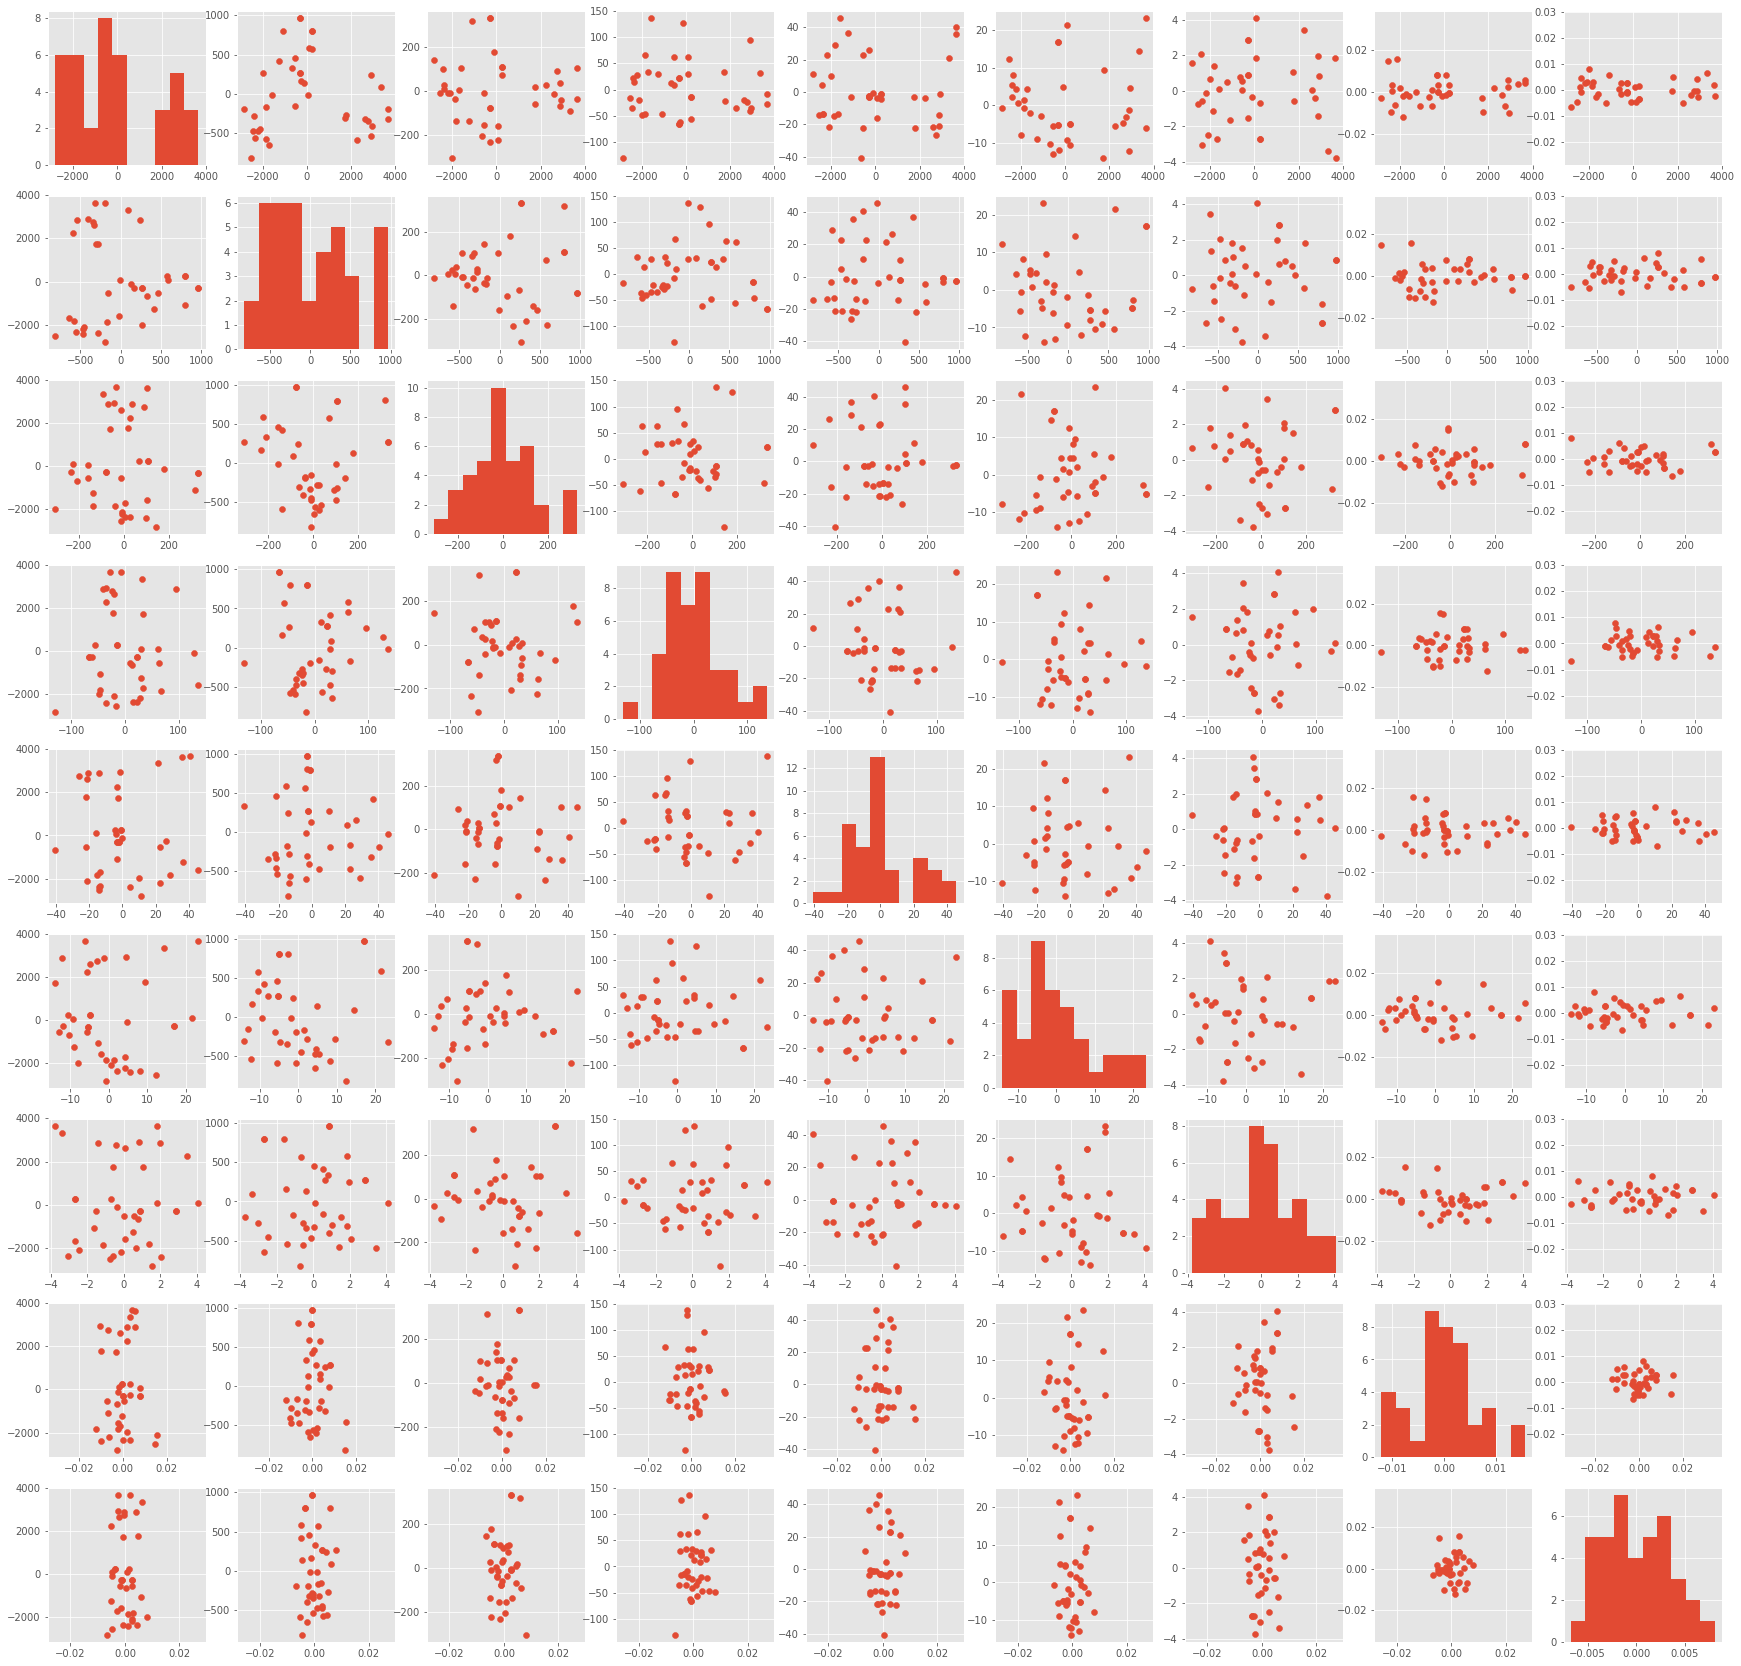

In [59]:
inspect(data_f)